<a href="https://colab.research.google.com/github/JUANES31081/PORTAFOLIO_/blob/main/editor_de_fotos_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INSTALACION LIBRERIAS

In [ ]:
pip install opencv-python-headless

In [ ]:
pip install opencv-python

In [ ]:
pip install pillow

###unzip si es necesario

In [ ]:
!unzip bowhouse.zip

Archive:  bowhouse.zip
  inflating: readThis.txt            
  inflating: Bowhouse-Black.otf      
  inflating: Bowhouse-Bold.otf       
  inflating: Bowhouse-Light.otf      
  inflating: Bowhouse-Regular.otf    


##Toma de recursos subida de fotos, marcos, fuentes, y lo que se necesite

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Use the function.
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

In [ ]:
# prompt: codigo para subir un archivo a la carpeta content de colab
print("Suba la imagen que desea editar")
from google.colab import files
uploaded = files.upload()
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)

Suba la imagen que desea editar


Saving TuyYo.jpg to TuyYo.jpg


In [ ]:
# prompt: codigo para subir un archivo a la carpeta content de colab
print("Suba el marco que desea para la imagen")
from google.colab import files
uploaded = files.upload()
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)

Suba el marco que desea para la imagen


Saving a-pompadour.zip to a-pompadour.zip


##FOTO Y MARCO

0: .config
1: photo.jpg
2: imagen_2024-01-03_230109357.png
3: panda.jpg
4: marco.png
5: pngwing.com (2).png
6: pngwing.com (1).png
7: pngwing.com.png
8: sample_data
Enter the index of the image you want to select: 1
Enter the index of the frame you want to select: 5


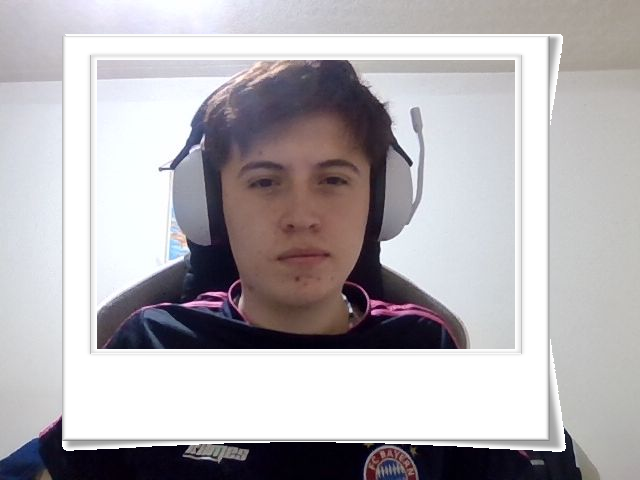

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Para mostrar la imagen en Colab

# Especifica la ruta a la carpeta.
folder_path = '/content'

# Lista todos los archivos en la carpeta.
files = os.listdir(folder_path)

# Imprime los archivos para que puedas ver qué archivos están disponibles.
for i, file in enumerate(files):
    print(f'{i}: {file}')

# Pide al usuario que seleccione la imagen.
image_index = int(input('Enter the index of the image you want to select: '))
image_path = os.path.join(folder_path, files[image_index])
image = cv2.imread(image_path)

# Pide al usuario que seleccione el marco.
frame_index = int(input('Enter the index of the frame you want to select: '))
frame_path = os.path.join(folder_path, files[frame_index])
frame = cv2.imread(frame_path, cv2.IMREAD_UNCHANGED)  # Asegúrate de que el marco tenga un canal alfa

# Calcula las dimensiones para una relación de aspecto de 4:3.
height = image.shape[0]
width = int(height * 4 / 3)

# Redimensiona la imagen y el marco para que tengan una relación de aspecto de 4:3.
image = cv2.resize(image, (width, height))
frame = cv2.resize(frame, (width, height))

# Convierte la imagen a 4 canales.
image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

# Crea una máscara donde el marco no es transparente.
mask = frame[:, :, 3] != 0

# Aplica el marco solo en las áreas donde el marco no es transparente.
image_with_frame = image.copy()
image_with_frame[mask] = frame[mask]

# Muestra la imagen con el marco.
cv2_imshow(image_with_frame)

0: .config
1: pngwing.com (3).png
2: photo.jpg
3: imagen_2024-01-03_230109357.png
4: TuyYo.jpg
5: panda.jpg
6: marco.png
7: pngwing.com (2).png
8: pngwing.com (1).png
9: pngwing.com.png
10: sample_data
Enter the index of the image you want to select: 4
Enter the index of the frame you want to select: 1


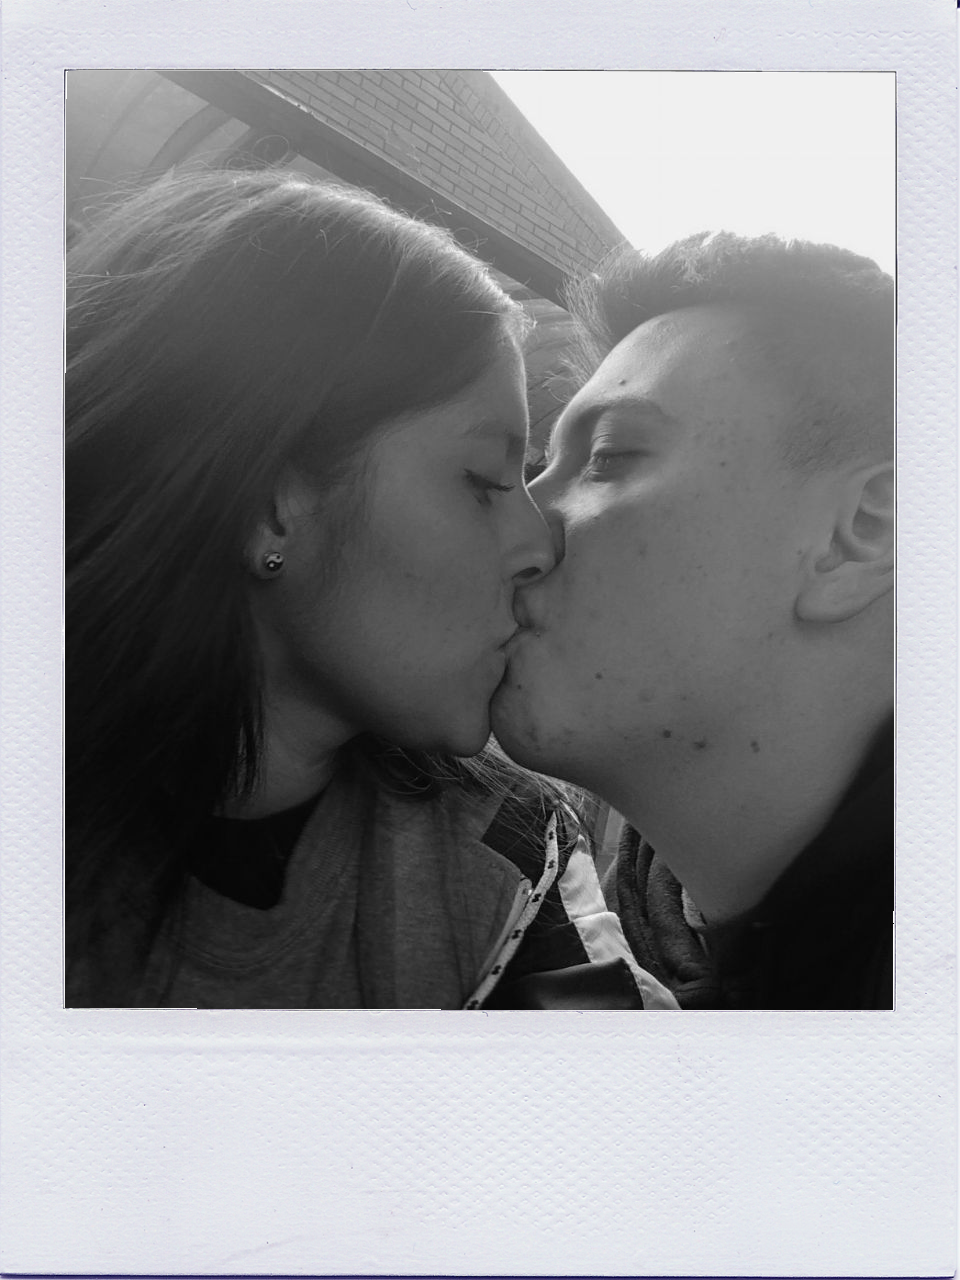

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Para mostrar la imagen en Colab

# Especifica la ruta a la carpeta.
folder_path = '/content'

# Lista todos los archivos en la carpeta.
files = os.listdir(folder_path)

# Imprime los archivos para que puedas ver qué archivos están disponibles.
for i, file in enumerate(files):
    print(f'{i}: {file}')

# Pide al usuario que seleccione la imagen.
image_index = int(input('Enter the index of the image you want to select: '))
image_path = os.path.join(folder_path, files[image_index])
image = cv2.imread(image_path)

# Pide al usuario que seleccione el marco.
frame_index = int(input('Enter the index of the frame you want to select: '))
frame_path = os.path.join(folder_path, files[frame_index])
frame = cv2.imread(frame_path, cv2.IMREAD_UNCHANGED)  # Asegúrate de que el marco tenga un canal alfa

# Obtiene las dimensiones de la imagen.
height, width = image.shape[:2]

# Redimensiona el marco para que tenga las mismas dimensiones que la imagen.
frame = cv2.resize(frame, (width, height))

# Convierte la imagen a 4 canales.
image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

# Crea una máscara donde el marco no es transparente.
mask = frame[:, :, 3] != 0

# Aplica el marco solo en las áreas donde el marco no es transparente.
image_with_frame = image.copy()
image_with_frame[mask] = frame[mask]

# Muestra la imagen con el marco.
cv2_imshow(image_with_frame)

In [ ]:
# Guarda la imagen con el marco en un archivo.
output_path = '/content/image_with_frame.png'
cv2.imwrite(output_path, image_with_frame)

True

##Efectos

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Especifica la ruta a la carpeta.
folder_path = '/content'

# Lista todos los archivos en la carpeta.
files = os.listdir(folder_path)

# Imprime los archivos para que puedas ver qué archivos están disponibles.
for i, file in enumerate(files):
    print(f'{i}: {file}')

# Pide al usuario que seleccione un archivo.
file_index = int(input('Enter the index of the file you want to select: '))

# Abre y lee el archivo seleccionado.
file_path = os.path.join(folder_path, files[file_index])
image = cv2.imread(file_path)

# Convierte la imagen a escala de grises.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Muestra la imagen.
cv2_imshow(gray_image)

##TEXTO EN LA IMAGEN

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np

# Convierte la imagen con el marco a un objeto de imagen PIL para agregar el texto.
image_with_frame_pil = Image.fromarray(cv2.cvtColor(image_with_frame, cv2.COLOR_BGRA2RGBA))

# Carga la fuente.
font_path = '/content/Bowhouse-Regular.otf'  # Reemplaza esto con la ruta a tu fuente
font_size = 175  # Reemplaza esto con el tamaño de fuente que quieras
font = ImageFont.truetype(font_path, font_size)

# Define el texto y la posición.
text = "07 / 03 / 2022"  # Reemplaza esto con tu texto
position = (55, image_with_frame_pil.height - 200)  # Reemplaza esto con la posición que quieras

# Crea un objeto ImageDraw y agrega el texto a la imagen.
draw = ImageDraw.Draw(image_with_frame_pil)
draw.text(position, text, font=font, fill=(0, 0, 0, 208))  # Cambia el color y la transparencia del texto según tus necesidades

# Convierte la imagen de PIL a OpenCV.
image_with_frame_and_text = cv2.cvtColor(np.array(image_with_frame_pil), cv2.COLOR_RGBA2BGRA)

# Muestra la imagen con el marco y el texto.
cv2_imshow(image_with_frame_and_text)

In [ ]:
# Guarda la imagen con el marco en un archivo.
output_path = '/content/image_with_font.png'
cv2.imwrite(output_path, image_with_frame_and_text)

True